# Example notebook for pyPROFILE

## Setup

In [6]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyPROFILE import model_profile
import contextlib
from time import time

@contextlib.contextmanager
def timer(msg='timer'):
    tic = time()
    yield
    return print(f"{msg}: {time() - tic:.2f} s")


## Find the optimal profile of net rate of production, R

The function find_optimal_profile returns a pandas DataFrame containing the initial data, the modeled concentration and the optimal profile of R.

In [7]:
with timer('Model profile'):
    df = model_profile("./Data/Example.csv", n_r = 20)

Model profile: 13.41 s


## Results visualization

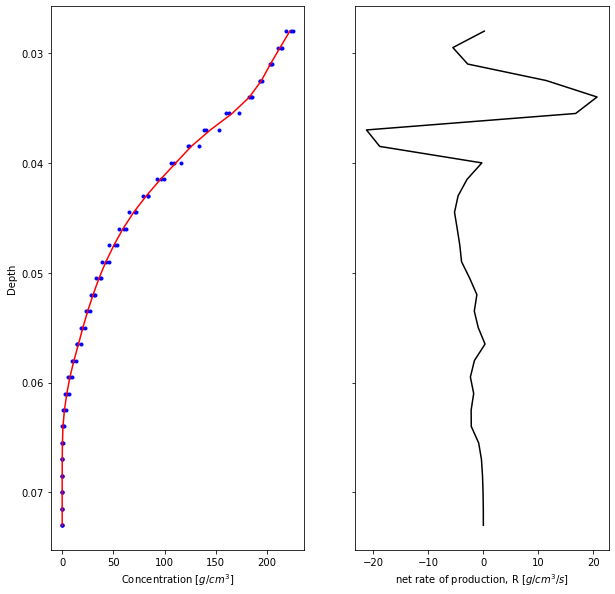

In [8]:
# Plot the ground truth
C_columns = [col for col in df.columns if (col[0]=='C' and col!='C_model')]
C_GT = df[C_columns].values
    
fig, ax = plt.subplots(1,2,figsize=[10,10], sharey=True)
plt.gca().invert_yaxis()
plt.sca(ax[0])
_ = plt.plot(C_GT,df['X'],'.b')
plt.ylabel('Depth')
plt.xlabel('Concentration [$g/cm^3$]')

# Plot the model
_ = plt.plot(df['C_model'],df['X'],'-r')

# Plot the profile of net rate of production (R)
plt.sca(ax[1])
_ = plt.plot(df['R'],df['X'],'-k')
_ = plt.xlabel('net rate of production, R [$g/cm^3/s$]')
